<a href="https://colab.research.google.com/github/VeekshithaKulal/Machine-learning/blob/main/regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
df=pd.read_csv("/content/AI_Developer_Performance.csv")
df

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,660,14,13,0,5.5,21,80,2,30,5.2,20,5
996,9,484,13,11,1,8.8,34,78,0,39,4.7,37,1
997,2,128,4,0,3,8.7,42,74,3,49,2.8,5,7
998,8,266,5,3,1,5.7,48,51,0,63,11.8,9,0


# **Correlation Heatmap(EDA)**

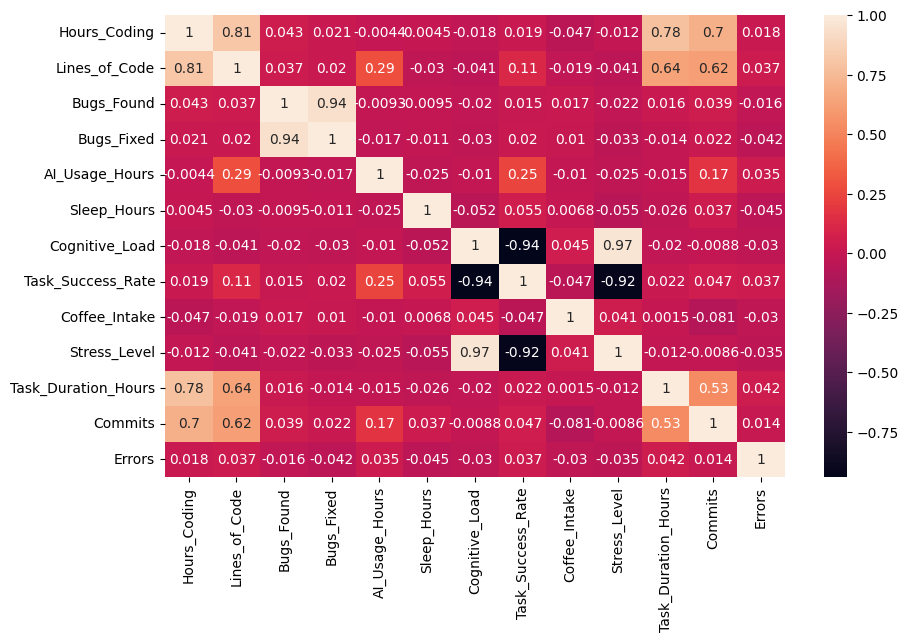

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="rocket")
plt.show()

# **Define target & features**

In [53]:
x=df.drop(["Task_Success_Rate"],axis=1)
y=df.iloc[:,-6]
x

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,6,82,7.0,25,9
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,660,14,13,0,5.5,21,2,30,5.2,20,5
996,9,484,13,11,1,8.8,34,0,39,4.7,37,1
997,2,128,4,0,3,8.7,42,3,49,2.8,5,7
998,8,266,5,3,1,5.7,48,0,63,11.8,9,0


In [54]:
y

,Task_Success_Rate
0,34
1,36
2,79
3,94
4,33
...,...
995,80
996,78
997,74
998,51


In [55]:
# converting into 2 dimensional array
y=y.values.reshape(-1,1)
y

array([[ 34],
       [ 36],
       [ 79],
       [ 94],
       [ 33],
       [ 39],
       [ 56],
       [ 40],
       [ 75],
       [ 30],
       [ 73],
       [ 63],
       [ 39],
       [ 92],
       [ 42],
       [ 30],
       [ 82],
       [ 78],
       [ 30],
       [ 56],
       [ 30],
       [ 61],
       [ 57],
       [ 51],
       [ 62],
       [ 85],
       [ 63],
       [ 30],
       [ 71],
       [ 30],
       [ 62],
       [ 30],
       [ 30],
       [ 56],
       [ 71],
       [ 75],
       [ 30],
       [ 84],
       [ 53],
       [ 30],
       [ 70],
       [ 78],
       [ 64],
       [ 30],
       [ 84],
       [ 80],
       [ 62],
       [ 85],
       [ 87],
       [ 66],
       [ 61],
       [ 33],
       [ 51],
       [ 54],
       [ 67],
       [ 40],
       [ 51],
       [100],
       [ 94],
       [ 54],
       [ 30],
       [ 32],
       [ 73],
       [ 61],
       [ 57],
       [ 70],
       [ 78],
       [ 70],
       [ 44],
       [ 56],
       [ 30],
      

# **Standard scaler(Numeric Data)**

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)


In [58]:
x

array([[ 0.36744203,  0.31780072, -0.15121299, ...,  0.30048946,
         0.25361258, -0.54759816],
       [-0.58283908, -0.46385952,  1.05710997, ...,  0.1335416 ,
        -0.02335784,  1.22571195],
       [ 1.63448352,  0.4401013 , -1.18691838, ...,  1.60268279,
         1.6384647 , -0.90226019],
       ...,
       [-1.21635983, -1.21361525, -1.01430081, ..., -0.98500909,
        -1.13123953,  0.87104993],
       [ 0.6842024 , -0.47981177, -0.84168325, ...,  0.51752168,
        -0.76194563, -1.61158423],
       [ 0.6842024 ,  1.31747503,  1.05710997, ..., -0.71789251,
        -0.57729868, -1.25692221]])

In [59]:
y

array([[-1.08524762],
       [-0.98911442],
       [ 1.07774923],
       [ 1.79874817],
       [-1.13331421],
       [-0.84491463],
       [-0.02778249],
       [-0.79684804],
       [ 0.88548284],
       [-1.277514  ],
       [ 0.78934965],
       [ 0.30868368],
       [-0.84491463],
       [ 1.70261498],
       [-0.70071484],
       [-1.277514  ],
       [ 1.22194902],
       [ 1.02968263],
       [-1.277514  ],
       [-0.02778249],
       [-1.277514  ],
       [ 0.21255049],
       [ 0.0202841 ],
       [-0.26811548],
       [ 0.26061709],
       [ 1.36614881],
       [ 0.30868368],
       [-1.277514  ],
       [ 0.69321645],
       [-1.277514  ],
       [ 0.26061709],
       [-1.277514  ],
       [-1.277514  ],
       [-0.02778249],
       [ 0.69321645],
       [ 0.88548284],
       [-1.277514  ],
       [ 1.31808221],
       [-0.17198228],
       [-1.277514  ],
       [ 0.64514986],
       [ 1.02968263],
       [ 0.35675028],
       [-1.277514  ],
       [ 1.31808221],
       [ 1

In [60]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x , y, test_size=0.2, shuffle=True, random_state=42)
x_test,x_train,y_test,y_train

(array([[ 1.63448352,  0.81763788,  1.57496266, ..., -0.05010105,
          3.02331681,  1.22571195],
        [-1.5331202 , -1.69218275,  1.57496266, ..., -1.15195695,
         -1.50053343, -1.61158423],
        [ 1.63448352,  1.08882612,  1.05710997, ...,  2.67114911,
          1.6384647 ,  0.87104993],
        ...,
        [-1.5331202 , -1.35186808,  1.57496266, ..., -1.21873609,
         -1.03891605, -0.54759816],
        [ 0.36744203, -0.88925284,  1.22972753, ..., -0.76797686,
         -0.30032826, -0.90226019],
        [ 1.31772314, -0.3947331 , -1.01430081, ...,  0.31718424,
          2.28472901, -0.54759816]]),
 array([[-0.89959945, -0.6499691 , -0.84168325, ..., -1.16865173,
         -1.13123953, -0.19293614],
        [-1.21635983, -0.54362077, -0.84168325, ..., -1.06848302,
         -0.48497521,  1.22571195],
        [-0.26607871, -0.47981177,  0.53925727, ..., -0.36730199,
         -0.30032826, -0.90226019],
        ...,
        [ 1.63448352,  0.75914629,  1.57496266, ...,  

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, r2])

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
results_df = pd.DataFrame(
    results, columns=["Model", "MAE", "MSE", "R2 Score"]
).sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model       MAE       MSE  R2 Score
5  Gradient Boosting  0.187120  0.055897  0.944966
4      Random Forest  0.190989  0.057975  0.942920
1   Ridge Regression  0.211946  0.065305  0.935704
0  Linear Regression  0.213384  0.066254  0.934769
6                SVR  0.269178  0.116139  0.885655
3      Decision Tree  0.257937  0.120196  0.881661
2   Lasso Regression  0.878537  1.017302 -0.001586
